In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Import Data

## A. Read and Check Data

In [75]:
src_df =  pd.read_excel('1688639662_ausapparalsales4thqrt2020.xlsx')

In [76]:
src_df.shape

(7560, 6)

In [77]:
src_df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [78]:
src_df.describe()

,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


In [79]:
src_df.head(3)

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000


## B. Get numerical and Categorical Columns

In [80]:
numerical_columns = list(src_df._get_numeric_data().columns)
numerical_columns

['Unit', 'Sales']

In [81]:
categorical_columns = list( set(src_df.columns)- set(numerical_columns) )
categorical_columns

['Time', 'State', 'Group', 'Date']

### Observation 
- Unit and sales are numerical columns
- Date, Time, Group and State are the Categorical colums

## C. Null Check

In [82]:
src_df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

### Observation 
- No columns have null value

## D. Analyzing the Numerical Columns

### 1. Univariate
We will plot Violin PLots for the the two numerical columns

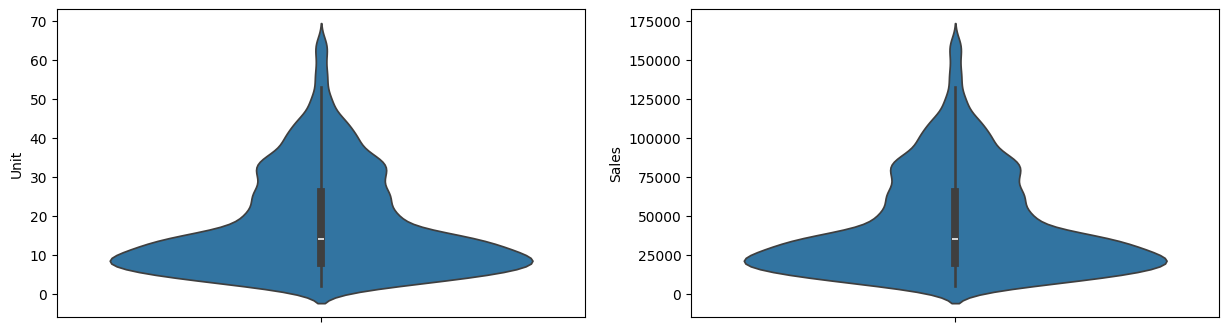

In [83]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.violinplot(src_df['Unit'])
plt.subplot(1,2,2)
sns.violinplot(src_df['Sales'])
plt.show()


### 2. Multivariate
Plotting a scatter plot to compare sales and Units

<Axes: xlabel='Sales', ylabel='Unit'>

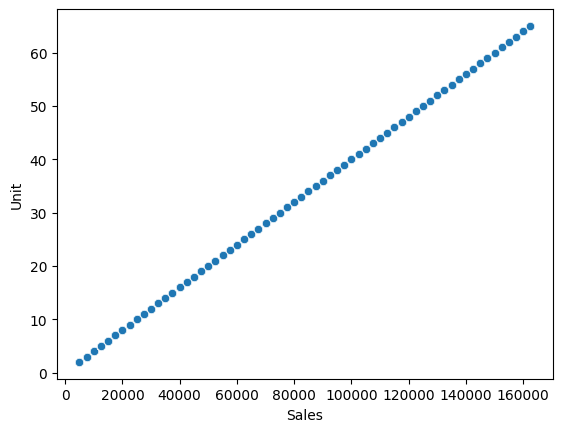

In [84]:
sns.scatterplot(data=src_df, x='Sales', y ='Unit',)

In [85]:
numerical_corr = src_df[numerical_columns].corr()
numerical_corr

,Unit,Sales
Unit,1.0,1.0
Sales,1.0,1.0


### 3. Observation
The above analysis proves that the two numerical columns are entirely correlated with each other and so for all the further sales analysis we can pick either 'Sales' or 'Unit'

## E. Analyzing categorical Columns

### 1. Univariate

#### a. Checking distinct values in each columns

In [86]:
for c in categorical_columns:
    print(c, '--->',src_df[c].unique())

Time ---> [' Morning' ' Afternoon' ' Evening']
State ---> [' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
Group ---> [' Kids' ' Men' ' Women' ' Seniors']
Date ---> <DatetimeArray>
['2020-10-01 00:00:00', '2020-10-02 00:00:00', '2020-10-03 00:00:00',
 '2020-10-04 00:00:00', '2020-10-05 00:00:00', '2020-10-06 00:00:00',
 '2020-10-07 00:00:00', '2020-10-08 00:00:00', '2020-10-09 00:00:00',
 '2020-10-10 00:00:00', '2020-10-11 00:00:00', '2020-10-12 00:00:00',
 '2020-10-13 00:00:00', '2020-10-14 00:00:00', '2020-10-15 00:00:00',
 '2020-10-16 00:00:00', '2020-10-17 00:00:00', '2020-10-18 00:00:00',
 '2020-10-19 00:00:00', '2020-10-20 00:00:00', '2020-10-21 00:00:00',
 '2020-10-22 00:00:00', '2020-10-23 00:00:00', '2020-10-24 00:00:00',
 '2020-10-25 00:00:00', '2020-10-26 00:00:00', '2020-10-27 00:00:00',
 '2020-10-28 00:00:00', '2020-10-29 00:00:00', '2020-10-30 00:00:00',
 '2020-11-01 00:00:00', '2020-11-02 00:00:00', '2020-11-03 00:00:00',
 '2020-11-04 00:00:00', '2020-11-05 00:00:00', '20

#### b.Looking on how the "Time", "State" and "Group" are distributed

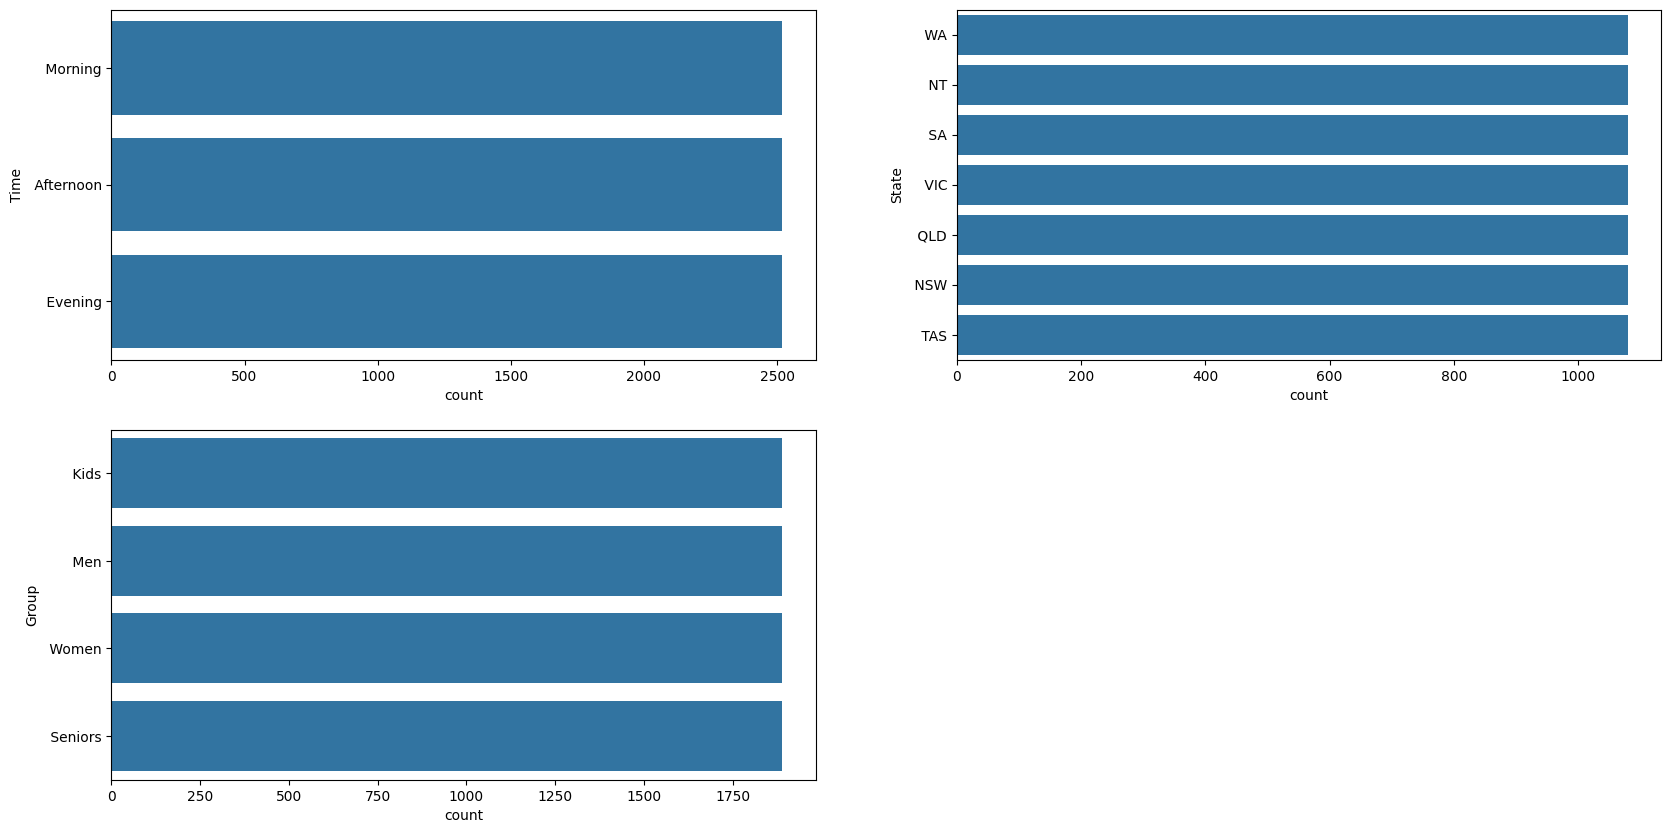

In [87]:
from math import ceil
import seaborn as sns
test_cat = ["Time", "State" ,"Group"]
plt.figure(figsize=(20, 10))
nrows = ceil( len(test_cat) / 2 )
for i, c in enumerate(test_cat):
    plt.subplot(nrows, 2 , i+1)
    sns.countplot(data=src_df, y=c)
plt.show()

# Step 2: Preprocessing

## A. General

In [88]:
src_df.dtypes

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

In [89]:
# Convert object to string
src_df['Time'] = src_df['Time'].astype('string')
src_df['State'] = src_df['State'].astype('string')
src_df['Group'] = src_df['Group'].astype('string')

In [90]:
src_df.dtypes

Date     datetime64[ns]
Time     string[python]
State    string[python]
Group    string[python]
Unit              int64
Sales             int64
dtype: object

## B. Numerical

### 1. Normalization

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

src_df['normalized_Sales'] = scaler.fit_transform(src_df[['Sales']])
src_df['normalized_Unit'] = scaler.fit_transform(src_df[['Unit']])
src_df.describe()


,Date,Unit,Sales,normalized_Sales,normalized_Unit
count,7560,7560.000000,7560.000000,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201,0.254054,0.254054
min,2020-10-01 00:00:00,2.000000,5000.000000,0.000000,0.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000,0.095238,0.095238
50%,2020-11-15 12:00:00,14.000000,35000.000000,0.190476,0.190476
75%,2020-12-08 00:00:00,26.000000,65000.000000,0.380952,0.380952
max,2020-12-30 00:00:00,65.000000,162500.000000,1.000000,1.000000
std,NaN,12.901403,32253.506944,0.204784,0.204784


# Step 3: Data Analysis

## A. Describe the the data

In [92]:
src_df.describe()

,Date,Unit,Sales,normalized_Sales,normalized_Unit
count,7560,7560.000000,7560.000000,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201,0.254054,0.254054
min,2020-10-01 00:00:00,2.000000,5000.000000,0.000000,0.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000,0.095238,0.095238
50%,2020-11-15 12:00:00,14.000000,35000.000000,0.190476,0.190476
75%,2020-12-08 00:00:00,26.000000,65000.000000,0.380952,0.380952
max,2020-12-30 00:00:00,65.000000,162500.000000,1.000000,1.000000
std,NaN,12.901403,32253.506944,0.204784,0.204784


## B. Highest Sales Generating Group

In [93]:
df_group_grouped = src_df.groupby(by='Group')['Sales'].sum()
max_sale_group = df_group_grouped.idxmax()
min_sale_group = df_group_grouped.idxmin()
print(f"Group: {max_sale_group} generate maximum sales" )
print(f"Group: {min_sale_group} generate minimum sales" )

Group:  Men generate maximum sales
Group:  Seniors generate minimum sales


## C. Highest Sales Generating State

In [94]:
df_state_grouped = src_df.groupby(by='State')['State'].sum()
max_sale_state = df_state_grouped.idxmax()
min_sale_state = df_state_grouped.idxmin()
print(f"State: {max_sale_state} generate maximum sales" )
print(f"State: {min_sale_state} generate minimum sales" )

State:  WA generate maximum sales
State:  NSW generate minimum sales


## D. Split date into day, month and year and set date as index

In [95]:
def get_month(date_var):
    return str(date_var).split('-')[1]

def get_date(date_var):
    return (str(date_var).split('-')[-1]).split(' ')[0]

def get_year(date_var):
    return (str(date_var).split('-')[0])

df_1 = src_df
df_1['year'] =  src_df['Date'].apply(lambda x: get_year(x))
df_1['month'] =  src_df['Date'].apply(lambda x: get_month(x))
df_1['day'] =  src_df['Date'].apply(lambda x: get_date(x))

src_df = df_1

src_df.set_index('Date', inplace= True)

## E. Monthly, Quarterly and weekly Sales

In [96]:
df_month_grouped = src_df.groupby(by='month')['Sales'].sum()
max_sale_month = df_month_grouped.idxmax()
min_sale_month = df_month_grouped.idxmin()
print(f"Month: {max_sale_month} generate maximum sales" )
print(f"Month: {min_sale_month} generate minimum sales" )
df_month_grouped

Month: 12 generate maximum sales
Month: 11 generate minimum sales


month
10    114290000
11     90682500
12    135330000
Name: Sales, dtype: int64

In [97]:
# Monthly Sales: approach 2
src_df[["Sales", "Unit", "normalized_Unit", "normalized_Sales"]].resample('M').sum()

/tmp/ipykernel_22567/2191126957.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  src_df[["Sales", "Unit", "normalized_Unit", "normalized_Sales"]].resample('M').sum()


,Sales,Unit,normalized_Unit,normalized_Sales
Date,,,,
2020-10-31,114290000,45716,645.650794,645.650794
2020-11-30,90682500,36273,495.761905,495.761905
2020-12-31,135330000,54132,779.238095,779.238095


In [98]:
# Quarterly Sales
src_df[["Sales", "Unit", "normalized_Unit", "normalized_Sales"]].resample('Q').sum()

/tmp/ipykernel_22567/1007675266.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  src_df[["Sales", "Unit", "normalized_Unit", "normalized_Sales"]].resample('Q').sum()


,Sales,Unit,normalized_Unit,normalized_Sales
Date,,,,
2020-12-31,340302500,136121,1920.650794,1920.650794


In [99]:
# Weekly Sales
src_df[["Sales", "Unit", "normalized_Unit", "normalized_Sales"]].resample('W-MON').sum()

,Sales,Unit,normalized_Unit,normalized_Sales
Date,,,,
2020-10-05,18907500,7563,106.714286,106.714286
2020-10-12,26935000,10774,152.349206,152.349206
2020-10-19,26805000,10722,151.523810,151.523810
2020-10-26,26590000,10636,150.158730,150.158730
2020-11-02,20797500,8319,116.047619,116.047619
2020-11-09,21065000,8426,115.079365,115.079365
2020-11-16,21242500,8497,116.206349,116.206349
2020-11-23,21187500,8475,115.857143,115.857143
2020-11-30,21442500,8577,117.476190,117.476190
